# 3D medical images

In this notebook we will work on CT scans. This is possible thanks to publicly available dataset such as the ones published on The Cancer Imaging Archive (TCIA). TCIA is a large, publicly accessible database of medical images of cancer patients. It was launched in 2011 by the National Cancer Institute (NCI) in collaboration with several other institutions, including the Foundation for the National Institutes of Health (FNIH) and the National Institutes of Health (NIH). This database contains a vast collection of medical images from a wide range of cancer types and imaging modalities, including MRI, CT, PET, and more. These images are accompanied by detailed clinical and pathological data, making it possible to investigate the relationships between imaging features and disease characteristics, treatment outcomes, and other factors. TCIA is designed to support a wide range of research applications, including cancer diagnosis and treatment planning, drug development, and the development of new imaging techniques and analysis methods. It is an important resource for the cancer research community, and has already been used in numerous research studies and clinical trials.

In this notebook we will use part of the data available from [NSCLC-radiomics dataset](https://wiki.cancerimagingarchive.net/display/Public/NSCLC-Radiomics). Which is a collection of medical images and radiomic features from non-small cell lung cancer (NSCLC) patients. The dataset was created by the Cancer Imaging Archive (TCIA) and contains imaging data from 422 NSCLC patients, including CT images and segmentation masks. The images we will work on were previously cropped and subsequently converted into NIfTI file format. The same task was performed on the labeled images (i.e. masks). For this notebook only the lung mask will be available, only one label was selected to reduce the computation time. In the next sections we will load, plot and manipulate both the CT scans and the labeled images. There are several python modules which come to aid for this task, such as: Nibabel, numpy, matplotlib, pyvista, scikit-image, etc.

Let's start by downloading the [data](https://pandora.infn.it/public/e5bfc3), unzip the downloaded file and navigate through the dataset:

We can see that each patient is identified by a number, the number is also a directory contained inside the lctsc directory contained in the data directory. Each patient is represented by 2 NIfTI files (i.e. CT scan and lung mask). We now need a simple way to read the data contained in the dataset, to do this we can use the python **glob** module

In [1]:
from glob import glob

cases = glob("/Users/luigidaddario/Downloads/data/lctsc/*")

print(cases)
print(len(cases))

['/Users/luigidaddario/Downloads/data/lctsc/57760', '/Users/luigidaddario/Downloads/data/lctsc/89289', '/Users/luigidaddario/Downloads/data/lctsc/11979', '/Users/luigidaddario/Downloads/data/lctsc/77304', '/Users/luigidaddario/Downloads/data/lctsc/49059', '/Users/luigidaddario/Downloads/data/lctsc/75001', '/Users/luigidaddario/Downloads/data/lctsc/90958', '/Users/luigidaddario/Downloads/data/lctsc/72967', '/Users/luigidaddario/Downloads/data/lctsc/61925', '/Users/luigidaddario/Downloads/data/lctsc/59718', '/Users/luigidaddario/Downloads/data/lctsc/46367', '/Users/luigidaddario/Downloads/data/lctsc/21490', '/Users/luigidaddario/Downloads/data/lctsc/33107', '/Users/luigidaddario/Downloads/data/lctsc/62335', '/Users/luigidaddario/Downloads/data/lctsc/56597', '/Users/luigidaddario/Downloads/data/lctsc/65516', '/Users/luigidaddario/Downloads/data/lctsc/27743', '/Users/luigidaddario/Downloads/data/lctsc/26206', '/Users/luigidaddario/Downloads/data/lctsc/96996', '/Users/luigidaddario/Download

Since the name of the CT scan and mask are always the same, we can define two variable to store those names:

In [2]:
ct_name = "ct.nii.gz"
mask_name = "lung.nii.gz"

We can start simple, before plotting the images, take the first case and check the content of the nifty file by pring out its header:

In [3]:
import nibabel as nib
import os

# first element of the cases array
i = 0
path_to_img = os.path.join(cases[i],ct_name)

# Load the NIfTI image
img = nib.load(path_to_img)

# Get the image data as a NumPy array
data = img.get_fdata()

# Print some information about the image
print(f"Shape: {data.shape}")
print(f"Data type: {data.dtype}")
print(f"Voxel size: {img.header.get_zooms()[:3]}")

Shape: (64, 64, 64)
Data type: float64
Voxel size: (5.0, 5.0, 5.0)


Now take the first case and plot the image and the mask one on top of the other along the 3 planes:

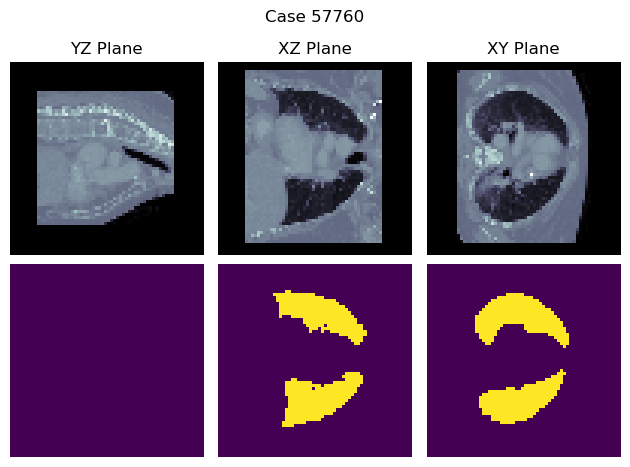

In [4]:
import matplotlib.pyplot as plt

path_to_mask = os.path.join(cases[i],mask_name)

# Load the NIfTI image
mask = nib.load(path_to_mask)

# Get the image data as a NumPy array
data_m = mask.get_fdata()

fig, ax = plt.subplots(2,3,tight_layout=True)

fig.suptitle("Case {}".format(cases[i].split("/")[-1]))

x_dim = data.shape[0]
y_dim = data.shape[1]
z_dim = data.shape[2]

ax[0,0].set_title("YZ Plane")
ax[0,0].imshow(data[x_dim//2], cmap="bone",vmin=-1000, vmax=1000)
ax[0,0].axis("off")

ax[0,1].set_title("XZ Plane")
ax[0,1].imshow(data[:,y_dim//2], cmap="bone",vmin=-1000, vmax=1000)
ax[0,1].axis("off")

ax[0,2].set_title("XY Plane")
ax[0,2].imshow(data[...,z_dim//2], cmap="bone",vmin=-1000, vmax=1000)
ax[0,2].axis("off")

ax[1,0].imshow(data_m[x_dim//2])
ax[1,0].axis("off")

ax[1,1].imshow(data_m[:,y_dim//2])
ax[1,1].axis("off")

ax[1,2].imshow(data_m[...,z_dim//2])
ax[1,2].axis("off")

plt.show()
plt.close()


Other than a mere bidimensional plot, we can also visualise data with a 3D plot by using PyVista. PyVista is an open-source Python library that provides a streamlined interface for 3D visualization and analysis of scientific datasets. It is built on top of the Visualization Toolkit (VTK) and offers a high-level, Pythonic interface that makes it easy to create complex visualizations and perform advanced analysis tasks.

PyVista supports a wide range of data types, including structured and unstructured grids, point clouds, and image data, and offers a variety of visualization techniques, such as contouring, slicing, and streamlines. It also provides tools for data analysis, such as mesh smoothing, surface reconstruction, and volume rendering.

With this python module we can easily plot the lung mask, could you find a way to plot the CT scan ?

To execute the following code box you need to:

`!pip install 'jupyterlab>=3' ipywidgets 'pyvista[all,trame]'`

and after importing pyvista you may need to:

`pv.set_jupyter_backend('trame')`

In [6]:
!pip install 'jupyterlab>=3' ipywidgets 'pyvista[all,trame]'

  Using cached pyvista-0.44.2-py3-none-any.whl.metadata (15 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached scooby-0.10.0-py3-none-any.whl.metadata (15 kB)
  Using cached cmocean-4.0.3-py3-none-any.whl.metadata (4.2 kB)
  Using cached colorcet-3.1.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached meshio-5.3.5-py3-none-any.whl.metadata (11 kB)
  Using cached jupyter_server_proxy-4.4.0-py3-none-any.whl.metadata (8.7 kB)
  Using cached trame-3.8.2-py3-none-any.whl.metadata (8.1 kB)
  Using cached trame_client-3.7.1-py3-none-any.whl.metadata (6.0 kB)
  Using cached trame_server-3.4.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached trame_vtk-2.8.15-py3-none-any.whl.metadata (13 kB)
  Using cached trame_vuetify-3.0.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached wslink-2.3.3-py3-none-any.whl.metadata (3.1 kB)
  Using cached more_itertools-10.6.0-py3-none-any.whl.metadata (37 kB)
  Using cached simpervisor-1.0.0-py3-none-any.whl.metadata (4.3 kB)
  Usin

In [7]:
import pyvista as pv
pv.set_jupyter_backend('trame')
import numpy as np

def get_mask(d,values):
    # Create the spatial reference
    grid = pv.ImageData()
    # Set the grid dimensions: shape
    grid.dimensions = np.array(values.shape)
    # Edit the spatial reference
    grid.origin = values.shape*np.array(d.header.get_zooms())
    # The bottom left corner of the data set
    grid.spacing = d.header.get_zooms()
    # These are the cell sizes along each axis
    grid.point_data["values"] = values.flatten(order="F")
    return grid.contour()

grid = get_mask(mask,data_m)
p = pv.Plotter(off_screen=True)
p.set_background('black')
p.add_mesh(grid, color="white", opacity=0.05, label="predicted lung")
p.camera_position = 'xz'
p.camera.azimuth = 180
p.show()

Widget(value='<iframe src="http://localhost:57823/index.html?ui=P_0x14e8dcce0_0&reconnect=auto" class="pyvista…

## Data Augmentation

As you might have noted, our dataset has only 60 images. Compared to the MNIST dataset this is a very small dataset. Anyhow, this is a common problem in medical image artificial neural network training. To overcome this problem we can trick the training process by manipulating the data in a way that the ANN learns to detect variations of the same object. This process is called **data augmentation**.

Data augmentation is an essential technique in machine learning for increasing the size of the training dataset and improving the generalization ability of deep learning models. Here are some of the main reasons why data augmentation is important:

- **Increased size of training dataset**: Data augmentation can create new samples from the existing ones by applying various transformations such as rotations, flips, shifts, and distortions. This increases the size of the training dataset and reduces the risk of overfitting. With a larger training dataset, deep learning models can learn better features and generalize better to new data.

- **Robustness to variations**: Data augmentation can help to make deep learning models more robust to variations in the input data, such as changes in lighting, orientation, scale, and position. By training on a variety of transformed images, deep learning models can learn to recognize patterns and features that are invariant to such variations.

- **Reduced dependency on labeled data**: Data augmentation can also help to reduce the dependency on labeled data by generating new samples with different labels. For example, if we have a limited number of labeled images of a certain class, we can generate new images with different orientations and backgrounds to increase the diversity of the training data. This can improve the accuracy of the deep learning model without requiring additional labeled data.

- **Improved performance**: Data augmentation has been shown to improve the performance of deep learning models in various computer vision tasks, including image classification, object detection, and segmentation. By incorporating data augmentation into the training pipeline, we can achieve state-of-the-art results with smaller datasets and fewer computational resources.

Even if not all of the mentioned data augmentation techniques can be applied to medical images (eg. we cannot change the gray scale intensity since this parameter is connected to the material), data augmentation can help to achieve better results with less effort and resources.

In the next example, we perform several types of random augmentations on the image, including rotation, scaling, and adding noise. Finally, we display the original image and the augmented images.

Let's see how we can apply some of those techniques to our data:

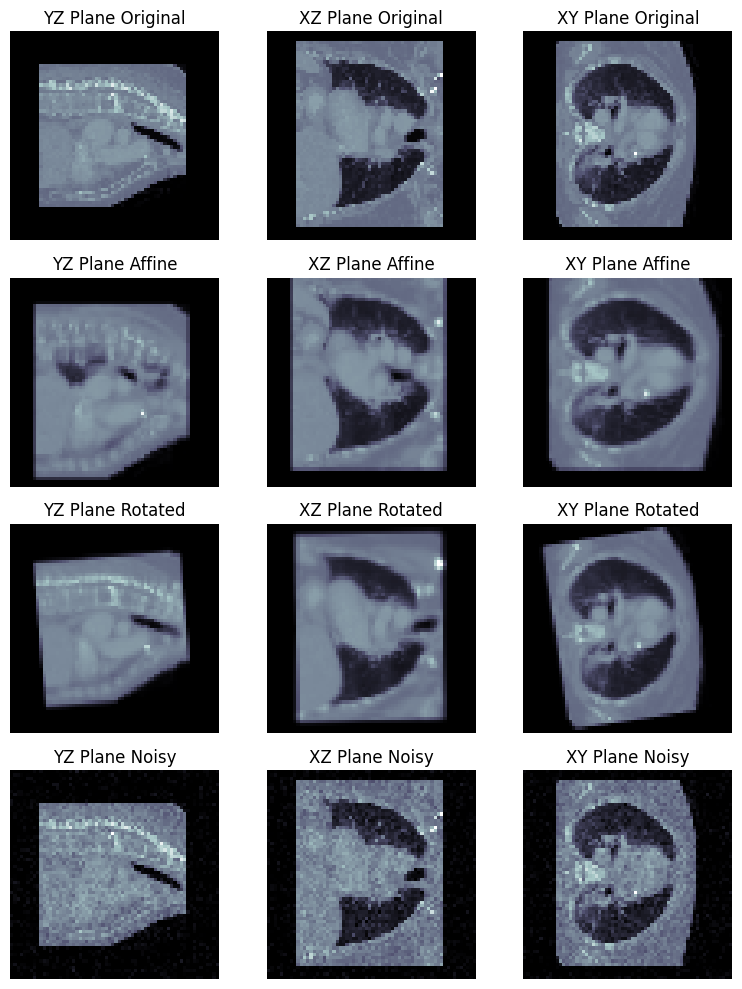

In [8]:
import numpy as np
from scipy import ndimage

# Load 3D image data

# Define transformation parameters
angle0 = np.random.uniform(low=-10, high=10)
angle1 = np.random.uniform(low=-10, high=10)
angle2 = np.random.uniform(low=-10, high=10)
scale = np.random.uniform(low=0.8, high=1.2, size=3)
shift = np.random.uniform(low=-5, high=5, size=3)
sigma = np.random.uniform(low=10, high=100)

# Perform affine transformation
affine = ndimage.affine_transform(data, np.diag(scale), shift, output_shape=data.shape, order=1, mode='nearest')

# Perform rotation
rotated = ndimage.rotate(data, angle0, axes=(1,2), reshape=False, order=1, mode='nearest')
rotated = ndimage.rotate(rotated, angle1, axes=(1,0), reshape=False, order=1, mode='nearest')
rotated = ndimage.rotate(rotated, angle2, axes=(2,0), reshape=False, order=1, mode='nearest')

# Perform noise deformation
noise = np.random.normal(scale=sigma, size=data.shape)
# Add noise to image
noisy_image = data + noise

# Display the original and augmented images
import matplotlib.pyplot as plt

images = [data,affine,rotated,noisy_image]
names  = ['Original','Affine','Rotated','Noisy']

fig, ax = plt.subplots(nrows=4, ncols=3, tight_layout=True, figsize=(8,10))

for i in range(len(images)):
    ax[i,0].set_title("YZ Plane {}".format(names[i]))
    ax[i,0].imshow(images[i][x_dim//2], cmap="bone",vmin=-1000, vmax=1000)
    ax[i,0].axis("off")

    ax[i,1].set_title("XZ Plane {}".format(names[i]))
    ax[i,1].imshow(images[i][:,y_dim//2], cmap="bone",vmin=-1000, vmax=1000)
    ax[i,1].axis("off")

    ax[i,2].set_title("XY Plane {}".format(names[i]))
    ax[i,2].imshow(images[i][...,z_dim//2], cmap="bone",vmin=-1000, vmax=1000)
    ax[i,2].axis("off")

plt.show()